In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
path = f"{root}/WMH_aug_runs"

dfc = rs.load_configs(
    path,
    properties=False,
)

  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
dfc.unique_per_col()

,1,16,8
slice_batch_size,6,2,2


,1,8
batch_size,8,2


,NaN,"[{""RandomAffine"": {""degrees"": [0, 360], ""p"": 0.5, ""scale"": [0.8, 1.1], ""translate"": [0, 0.2]}}, {""RandomVariableElasticTransform"": {""alpha"": [1, 2], ""p"": 0.75, ""sigma"": [6, 8]}}, {""RandomHorizontalFlip"": {""p"": 0.5}}, {""RandomVerticalFlip"": {""p"": 0.5}}]"
augmentations,5,5


In [4]:
df = rs.load_metrics(dfc)

  0%|          | 0/10 [00:00<?, ?it/s]

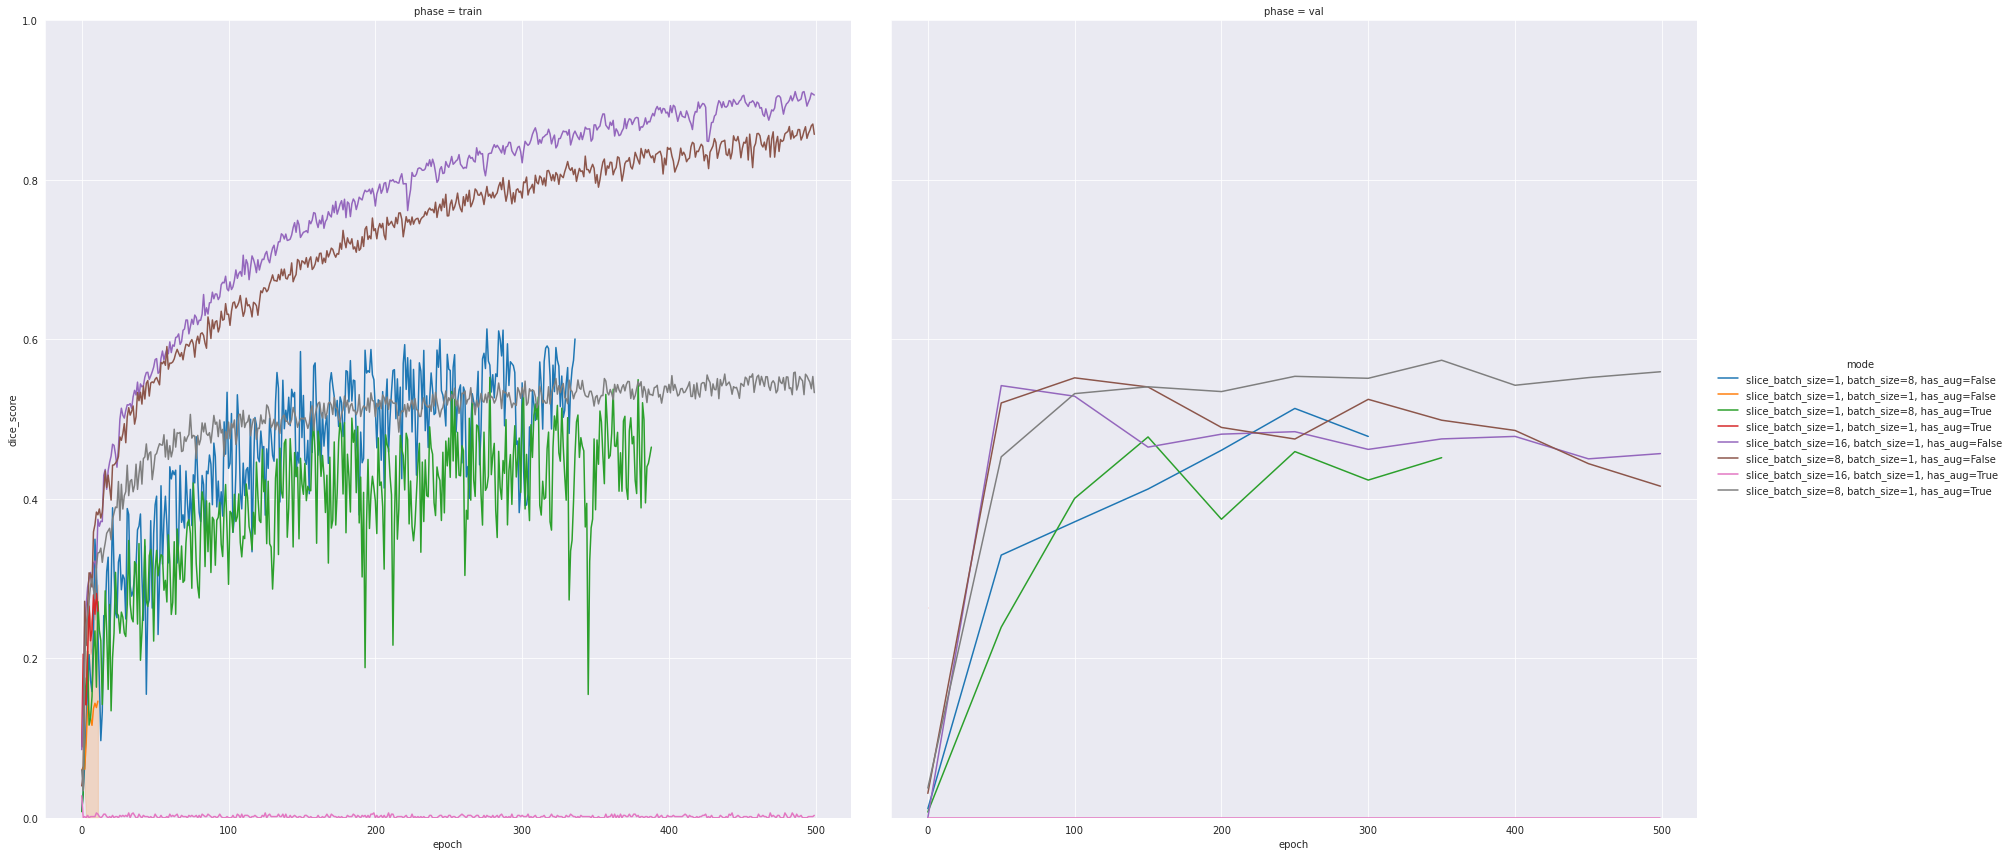

In [6]:
def has_aug(augmentations):
    return not(augmentations == 'NaN')

def mode(slice_batch_size, batch_size, has_aug):
    return f"slice_batch_size={slice_batch_size}, batch_size={batch_size}, has_aug={has_aug}"

df.augment(has_aug)
df.augment(mode)

g = sns.relplot(
    data=df,
    x='epoch',
    y='dice_score',
    col='phase',
    hue='mode',
    kind='line',
    height=12,
    )

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
g.set(ylim=(0, 1))